In [1]:
pip install emnist

Epoch 1/5
1950/1950 [==============================] - 64s 33ms/step - loss: 0.4798 - accuracy: 0.8519 - val_loss: 0.2903 - val_accuracy: 0.9093
Epoch 2/5
1950/1950 [==============================] - 63s 32ms/step - loss: 0.2424 - accuracy: 0.9201 - val_loss: 0.2391 - val_accuracy: 0.9230
Epoch 3/5
1950/1950 [==============================] - 63s 32ms/step - loss: 0.1927 - accuracy: 0.9349 - val_loss: 0.2184 - val_accuracy: 0.9278
Epoch 4/5
1950/1950 [==============================] - 62s 32ms/step - loss: 0.1614 - accuracy: 0.9440 - val_loss: 0.2139 - val_accuracy: 0.9306
Epoch 5/5
1950/1950 [==============================] - 62s 32ms/step - loss: 0.1358 - accuracy: 0.9510 - val_loss: 0.2186 - val_accuracy: 0.9312


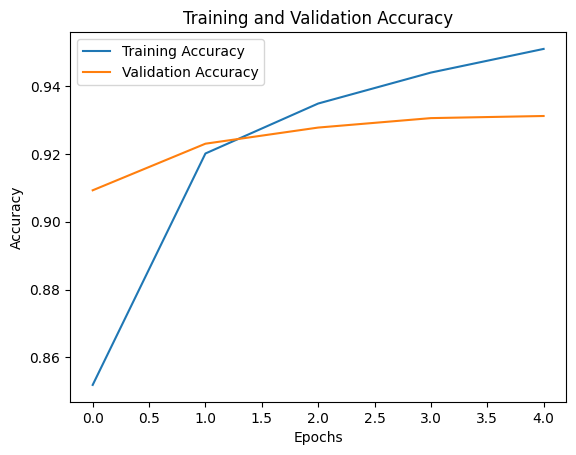

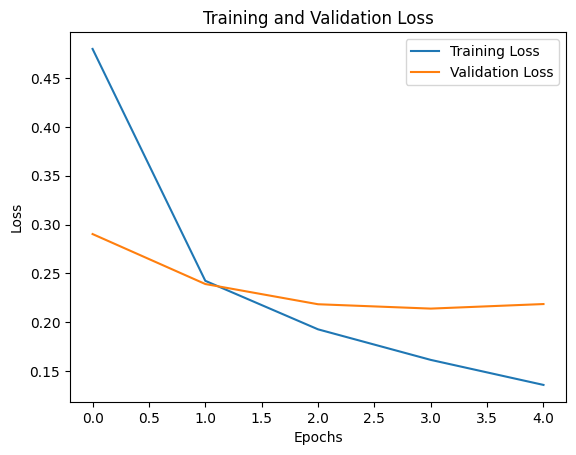

In [3]:
import numpy as np
from emnist import extract_training_samples, extract_test_samples
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load EMNIST dataset
train_images, train_labels = extract_training_samples('letters')
test_images, test_labels = extract_test_samples('letters')

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels - 1, 27)
test_labels = to_categorical(test_labels - 1, 27)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(27, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record history
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [4]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

650/650 [==============================] - 4s 6ms/step - loss: 0.2186 - accuracy: 0.9312
Test Accuracy: 93.12%


650/650 [==============================] - 6s 8ms/step


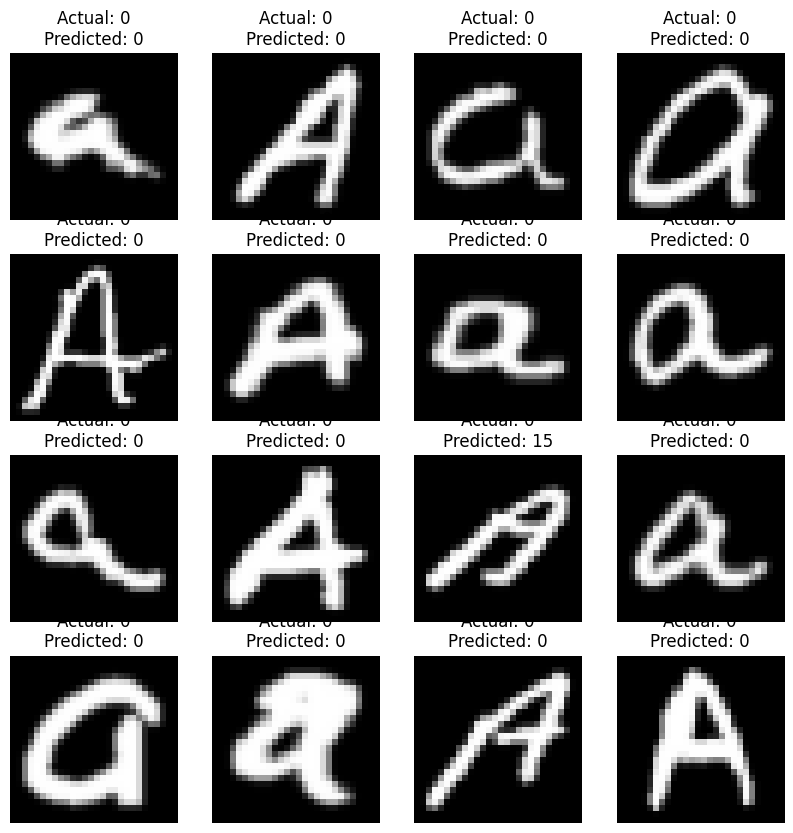

In [5]:
import matplotlib.pyplot as plt
import numpy as np

num_rows = 4
num_cols = 4
num_images = num_rows * num_cols
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {np.argmax(test_labels[i])}\nPredicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.show()